In [62]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### Question 1: Events, their Probabilities, and Payoff in the Roulette Game

1. Assuming a perfectly balanced Roulette wheel, calculate the probabilities of each following event (bet):
    - Straight up = Any single number
    - Split = any two adjoining numbers vertical or horizontal 
    - Odd = any odd number 
    - 1st Column  (1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34)

2. Let $X$ be a random variable describing the payout on one of the following bets (strictly speaking we would define one random variable per bet), such that:
    - When a straight up bet is won, X=36 otherwise -1 
    - When a split up bet is won, X=18 otherwise -1 
    - When an odd bet is won, X=2 otherwise -1 
    - When a 1st column bet is won, X=3 otherwise -1 

What is the expected payout $\mathbb{E}(X)$ for each bet?

3. Assume now that the roulette wheel is not perfectly balanced. This means that the probability of one outcome may be higher than the others. Describe a potential wheel's probability function and event that would lead to $\mathbb{E}(X)>0$.

----

### Question 2: Conditional Probability and Independence

In the green and orange balls setup, two balls are picked in sequence. You can use the decision tree for solving this problem. Alternatively, you can solve it by noticing that 
$$ P(green ball) = P(red,green ball) + P(blue, green ball) $$
And applying the conditional probability rule.

- With replacement of the picked ball. What is the probability that two orange balls are picked? Are the two picks independent?

- Without replacement of the picked ball. What is the probability that two orange balls are picked? Are the two picks independent?

----

### Question 3: Discrete Distribution and the Memory Recall Experiment

- In the memory recall sample, sample correct (simulated) number of responses for r = [1.  , 0.81, 0.7 , 0.47, 0.35, 0.21]. For this, use the function `np.random.binomial`, assuming 90 questions. For example:

In [86]:
N = 90
r = 1
y = np.random.binomial(N,r,1)
print(y)

[90]


- Assuming r=.95. What is the probability that all answers are correct? You can use the function `scipy.stats.binom.pmf(k,N,r)`
- Compute 100 samples from this distribution. Calculate the sample mean and the sample variance over these 100 samples. 
- Calculate or search online for the expectation and variance of the Binomial distribution. Do the sample means match the expectations? Why?
- Write the log-likelihood function for these 100 samples

In [87]:
def log_likelihood_recall(r, samples):
    return #Your code here

Plot it for $.8<r<1.0$ with the following code (no changes necessary). Explain the resulting curve (label the axes, comment on the maxima if any etc.)

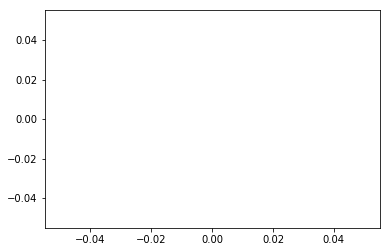

In [88]:
ll = []
range_r = np.arange(.8,1.0,.01)
for r in range_r:
    ll.append(log_likelihood_recall(r, y))
    
plt.plot(range_r, ll);

----

### Question 4: Continuous Distribution

Recall the BOLD fMRI experiment
$$
\begin{split}
y_i &= \alpha + x_i \beta + \epsilon_i\\
\epsilon_i &\sim N(0,.2)
\end{split}
$$

- Assuming parameters $\beta=.97$ and $\alpha=.43$, create 10 random samples of $y$ for each of $x$ equal to `[-1,-.65,-.5,-.1,0,.2,.5,.8]`. You can use the function `np.random.normal` to generate the random samples $\epsilon$.

In [43]:
N = 10
mu = 0
sigma = .1
np.random.normal(mu, sigma, size=N)

array([-0.00058318, -0.00880887, -0.04606187,  0.00880336,  0.14674301,
       -0.08045394, -0.10727272,  0.03355126, -0.00121802,  0.06867863])

- What is the distribution for $y$, including its parameters $\mu$ and $\sigma$?
- For x=.65, what is the probability that y lies between .96 and 1.16. You can use the function `scipy.stats.norm.cdf`. For example:

In [44]:
mu = 0
sigma = .1
scipy.stats.norm.cdf(.3,mu,sigma)

0.9986501019683699

----

Solutions

In [45]:
mu = .43+.97*.65
mu

1.0605

In [46]:
sigma = .2
scipy.stats.norm.cdf(1.16,mu,sigma) - scipy.stats.norm.cdf(.96,mu,sigma)

0.38292382234545586

In [ ]:
Question 3:

In [74]:
s=np.random.binomial(90,.95,size=100)
def log_likelihood_recall(r, samples):
    return np.log(scipy.stats.binom.pmf(samples,90,r)).sum()

In [75]:
log_likelihood_recall(.1, s)

-18120.184497289847

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


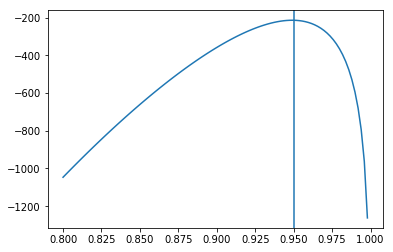

In [76]:
rr = np.linspace(.8,1.0,100)
ll = [log_likelihood_recall(r, s) for r in rr]
plt.plot(rr,ll)
plt.axvline(.95)